 **CDA Block 4 Project Assignment**


**Instructions**

**Make a copy of this notebook.**

**Rename the notebook to *your_name - Block 4 Assignment.ipynb*.**


##Introduction

We will be looking at the sales of a bicycle company. The data spans across sales, customer demographics and products. The datasets are just a small part of a much larger database. 

Such datasets are very common in a business setting, where different information are kept in different tables and connected via one or two variables (foreign keys).

The business objectives for this assignment are

1. Understanding more about the customers and their spending habits
2. Which group of customers to target
3. Predicting the lifetime value of each customer





### About the datasets

The file **aw_bicycle.xlsx** (in Block 4 data folder) contains a few sheets:

* **Sales Customer**: connecting file between customer and sales
* **Sales SalesOrderHeader**: information regarding sales orders (order/invoice level)
* **Sales SalesOrderDetail**: information regarding each sales item (itemized level)
* **Sales vPersonDemographics**: customer attributes (e.g. birthday, marital status, gender, etc.)
* **Production Product**: product name and attributes



To connect the datasets, here are the key columns/variables:

* **Sales Customer** to **Sales SalesOrderHeader**: *CustomerID*
* **Sales Customer** to **Sales vPersonDemographics**: *PersonID* to *BusinessEntityID*
* **Sales SalesOrderHeader** to **Sales SalesOrderDetail**: *SalesOrderID*
* **Sales SalesOrderDetail** to **Production Product**: *ProductID*



###**To do**

####RFM Clustering Analysis

1.   Connect the **SalesOrderDetail** to **SalesOrderHeader** such that you can perform a Recency, Frequency, Monetary analysis
  * **Recency**: Use the latest *OrderDate* as the benchmark to measure the number of days a customer (*CustomerID*) last purchased.
  * **Frequency**: Count the number of *SalesOrderID* at the detailed item level per customer.
  * **Monetary**: Sum the total of *LineTotal* (Quantity * Unit Price) at the detailed item level per customer.
  * Combine all 3 metrics at the customer level (each row is one unique customer).
  * Remove outliers if you need (trim by 1st and 99th percentile).

2. Perform a clustering (kmeans) analysis on the **RFM** dataset.
  * How many number of clusters did you choose and why?
  * Which group of customers are important in terms of RFM?
    * Is there enough customers in this group? If not, which other group should you focus your attention on?
  * Which group of customers you should ignore?

####Customer Lifetime Value Prediction

There are many definitions of lifetime value of a customer. The general idea is the **average spending of a customer** mulitipled by the **time they spend at your business**.

1. We will define lifetime value of a customer by using our RFM dataset (at per customer level).
  * Find the *average_spend_value* (average Spend value per customer) by taking *monetary* / *frequency*
  * Define *max_no_days* (maximum number of days) by the total length of days in the dataset (max - min *OrderDate*).
  * Define the *years_of_service* to each customer by taking (*max_no_days* - *recency*) / 365.
  * Define *lifetime_value* by multiplying *average_spend_value* by *years_of_service*.

2. We need some demographics of customers to help us predict what are the important factors that can help us predict the lifetime value. 
  * Connect the **RFM** dataset to **Sales vPersonDemographics** via **SalesCustomer**. Be sure to remove any NA records. 
  * Run a prediction model (Regression or Classification)
    * Target variable: *lifetime_value*.
    * Compare and select the best model based on minimum MAPE (Regression) or maximum F1 (Classification).
    * Explore the important features of the best model, and extract the demographics of the customers based on the important features. What can be said regarding such customers?
    * Optional: Plot and compare the customers between different groups
    * Optional: What are the kind of products the customers bought? Have to connect to **Production Product** dataset. 



##Setup

In [ ]:
# Mount Google drive
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install required packages
# Swifter does not come pre-installed on Colab
# Swifter helps us to speed up Pandas apply methods
!pip3 install swifter

# Pandas profiling helps us to explore the data easily
# -I force installs all related packages 
!pip3 install -I pandas-profiling

# We may also use a couple AutoML tools to increase our productivity
# not used in this notebook
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.7 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=0e4b5f2887ef036fe2232b92e3893cabf3128dc6c7f4cce027c09fd41a7777d4
  Stored in directory: /root/.cache/pip/wheels/08/66/b4/921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.2/701.2 KB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 

In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import libraries needed
import os
import swifter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization setting
%matplotlib inline
sns.set_style('darkgrid')


##read files

In [ ]:
# define folder path
folder_path = "/content/drive/MyDrive/cda_data/Block 5"
file_path = os.path.join(folder_path, "aw_bicycle.xlsx")


In [ ]:
# read in excel file
# https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

# read sales customer dataframe

df_sales_customer = pd.read_excel(file_path, sheet_name = "Sales Customer")
df_sales_customer.head()

,CustomerID,PersonID,StoreID,TerritoryID,AccountNumber,rowguid,ModifiedDate
0,11015,10963.0,NaN,4,AW00011015,F791BD74-EB82-4631-B9FC-F9FEE621FD13,2014-09-12 11:15:07
1,11016,3800.0,NaN,4,AW00011016,023843CA-25FB-42BF-AC37-FAF6F4120DAC,2014-09-12 11:15:07
2,11023,4373.0,NaN,4,AW00011023,A2833BD8-44A8-4665-808E-33E19ECD7F54,2014-09-12 11:15:07
3,11024,16843.0,NaN,4,AW00011024,EE8EEBF8-117C-4027-873D-6113B0E97489,2014-09-12 11:15:07
4,11036,20539.0,NaN,4,AW00011036,2E40BEAF-4A55-4E4D-A87D-009CC27D4378,2014-09-12 11:15:07


In [ ]:
# read sales order header
df_sales_order_header = pd.read_excel(file_path, sheet_name="Sales SalesOrderHeader")
df_sales_order_header.head()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,43702,8,2011-06-01,2011-06-13,2011-06-08,5,True,SO43702,NaN,10-4030-027645,...,8087.0,1230194Vi41919,NaN,3578.27,286.2616,89.4568,3953.9884,NaN,9310C7F0-9A84-4CE9-BE08-F700FB1AADF7,2011-06-08
1,43706,8,2011-06-02,2011-06-14,2011-06-09,5,True,SO43706,NaN,10-4030-027621,...,10912.0,230189Vi56258,NaN,3578.27,286.2616,89.4568,3953.9884,NaN,F02C4CB6-A5B5-4CE4-9473-CB084E383196,2011-06-09
2,43707,8,2011-06-02,2011-06-14,2011-06-09,5,True,SO43707,NaN,10-4030-027616,...,19069.0,230298Vi99064,NaN,3578.27,286.2616,89.4568,3953.9884,NaN,0DA77D6E-223E-4BC6-A2ED-43B387692C68,2011-06-09
3,43713,8,2011-06-04,2011-06-16,2011-06-11,5,True,SO43713,NaN,10-4030-027601,...,16570.0,830288Vi85808,NaN,3578.27,286.2616,89.4568,3953.9884,NaN,9DE30294-9066-4988-A3AD-09A0713348E5,2011-06-11
4,43719,8,2011-06-05,2011-06-17,2011-06-12,5,True,SO43719,NaN,10-4030-027612,...,5998.0,1130295Vi31203,NaN,3578.27,286.2616,89.4568,3953.9884,NaN,BF5155EB-C5BE-4245-8FC4-F801DB5B052D,2011-06-12


In [ ]:
# read sales order details
df_sales_order_details = pd.read_excel(file_path, sheet_name = "Sales SalesOrderDetail")
df_sales_order_details.head(2)

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,51178,37753,NaN,1,870,1,4.99,0.0,4.99,EA75710F-2568-42FF-B92B-1518FE295200,2013-05-30
1,51180,37760,NaN,1,870,1,4.99,0.0,4.99,48A11063-A834-497E-B52B-82EE30589F4C,2013-05-30


In [ ]:
# read in product file
df_production_product = pd.read_excel(file_path, sheet_name="Production Product")
df_production_product.head(2)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,False,False,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaT,NaN,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08 10:01:36.827
1,2,Bearing Ball,BA-8327,False,False,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaT,NaN,58AE3C20-4F3A-4749-A7D4-D568806CC537,2014-02-08 10:01:36.827


In [ ]:
# read in demographics file

##merge and explore transaction data

In [ ]:
# merge product and sales detail file (main)
df_detail_prod = df_sales_order_details.merge(df_production_product, 
                                           how='left', 
                                           on='ProductID', 
                                           suffixes=['_sales_det','_prod'])
df_detail_prod.head(2)

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid_sales_det,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid_prod,ModifiedDate_prod
0,51178,37753,NaN,1,870,1,4.99,0.0,4.99,EA75710F-2568-42FF-B92B-1518FE295200,...,S,NaN,NaN,28.0,111.0,2013-05-30,NaT,NaN,834E8D1A-69A7-4C42-8B68-FA08D9EC9E5B,2014-02-08 10:01:36.827
1,51180,37760,NaN,1,870,1,4.99,0.0,4.99,48A11063-A834-497E-B52B-82EE30589F4C,...,S,NaN,NaN,28.0,111.0,2013-05-30,NaT,NaN,834E8D1A-69A7-4C42-8B68-FA08D9EC9E5B,2014-02-08 10:01:36.827


In [ ]:
# merge sales order header and details (main)
df_sales_order = pd.merge(left=df_detail_prod, 
                        right=df_sales_order_header, 
                        how='left', 
                        on='SalesOrderID', 
                        suffixes=['_sales_det','_sales_head'])
df_sales_order.head(2)



,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid_sales_det,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,51178,37753,NaN,1,870,1,4.99,0.0,4.99,EA75710F-2568-42FF-B92B-1518FE295200,...,3760.0,216547Vi19810,NaN,2334.97,186.7976,58.3743,2580.1419,NaN,968B58F6-8CA8-4163-B3E0-14C386E8DFD6,2013-06-06
1,51180,37760,NaN,1,870,1,4.99,0.0,4.99,48A11063-A834-497E-B52B-82EE30589F4C,...,16046.0,820164Vi82960,NaN,2542.31,203.3848,63.5578,2809.2526,NaN,7FFE4ECC-5FFA-4EFC-BEDE-F338CD35E2F1,2013-06-06


In [ ]:
from pandas_profiling import ProfileReport
#!pip install ipywidgetsS

In [ ]:
# run pandas profiling to take a look at the sales order header and detailed data
report = ProfileReport(df_sales_order, html={'style':{'full_width':True}}) 

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report.to_file('profile_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##calculate recency, freqency, monetary

In [ ]:
# remove columns not needed from df_sales_order_header for recency calculations
df_sales_order_header.drop(columns=['TerritoryID', 'BillToAddressID', 'ShipToAddressID', 'ShipMethodID', 'CreditCardID', 'CreditCardApprovalCode', 'CurrencyRateID', 
                                    'SubTotal', 'TaxAmt', 'Freight', 'TotalDue', 'Comment', 'rowguid'], inplace=True)

In [ ]:
#### create recency variable
# based on latest OrderDate as days = 0 (max OrderDate - current line OrderDate)
# grouped by CustomerID
# set the index as CustomerID
# recency variable will be timedelta datatype, convert to integer using dt.days() 
df_sales_order['recency'] = max(df_sales_order.OrderDate) - df_sales_order.OrderDate
df_sales_order.sort_values('recency', ascending=True)
rfm_r = df_sales_order.groupby('CustomerID')['recency'].min()
rfm_r = rfm_r.reset_index().set_index('CustomerID')
rfm_r['recency'] = rfm_r.recency.dt.days

In [ ]:
rfm_r

,recency
CustomerID,
11000,270
11001,49
11002,339
11003,263
11004,272
...,...
30114,121
30115,91
30116,121


In [ ]:
df_sales_order.head(10)

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid_sales_det,...,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate,recency
0,51178,37753,NaN,1,870,1,4.99,0.0,4.99,EA75710F-2568-42FF-B92B-1518FE295200,...,216547Vi19810,NaN,2334.97,186.7976,58.3743,2580.1419,NaN,968B58F6-8CA8-4163-B3E0-14C386E8DFD6,2013-06-06,396 days
1,51180,37760,NaN,1,870,1,4.99,0.0,4.99,48A11063-A834-497E-B52B-82EE30589F4C,...,820164Vi82960,NaN,2542.31,203.3848,63.5578,2809.2526,NaN,7FFE4ECC-5FFA-4EFC-BEDE-F338CD35E2F1,2013-06-06,396 days
2,51191,37790,NaN,1,870,1,4.99,0.0,4.99,FC5AE823-6DB6-46F1-938C-C964060DBF0D,...,719210Vi12295,NaN,2344.96,187.5968,58.6240,2591.1808,NaN,96EFBBA5-0145-4025-8F9F-0EED56CA7B08,2013-06-07,395 days
3,51196,37804,NaN,1,870,1,4.99,0.0,4.99,EC5E95F4-4410-4872-9166-364E2C60C878,...,439136Vi29988,8411.0,638.95,51.1160,15.9738,706.0398,NaN,6E5983D9-21CF-4500-A5BF-BB14656959F4,2013-06-07,395 days
4,51197,37809,NaN,1,870,1,4.99,0.0,4.99,6E7DDB1D-BAF3-4F44-9B1B-6BCFE86ECD22,...,639470Vi51713,8411.0,2318.96,185.5168,57.9740,2562.4508,NaN,6067B94A-80CC-43CC-A038-1DCA9C3E3374,2013-06-07,395 days
5,51198,37813,NaN,1,870,1,4.99,0.0,4.99,BABB73C7-BE3F-4307-BCC1-AF0A64082387,...,939514Vi26471,8411.0,2334.97,186.7976,58.3743,2580.1419,NaN,339A9926-1825-4424-B430-F223D53E7D77,2013-06-07,395 days
6,51199,37817,NaN,1,870,1,4.99,0.0,4.99,3233083A-323B-4C76-835F-BBD33174D51C,...,241134Vi50623,NaN,562.96,45.0368,14.0740,622.0708,NaN,53C2C0F1-E509-4B04-A433-8F298CA44B69,2013-06-07,395 days
7,51203,37826,NaN,1,870,1,4.99,0.0,4.99,FCC89697-3FED-4618-B703-9BB28F3DDD67,...,716042Vi26255,8422.0,2457.33,196.5864,61.4333,2715.3497,NaN,780FC35F-8012-49C0-A665-219D7B78DA6A,2013-06-08,394 days
8,51205,37830,NaN,1,870,1,4.99,0.0,4.99,73404B80-7A91-4CBD-802D-D8A8E56DF7E1,...,816548Vi23273,8427.0,2369.96,189.5968,59.2490,2618.8058,NaN,F3B62474-E318-4CFF-B0CD-97ADD37CDDE5,2013-06-08,394 days
9,51206,37834,NaN,1,870,1,4.99,0.0,4.99,4B89A6F2-1BC5-45A8-98E6-82015E607A85,...,316553Vi43879,8427.0,2318.96,185.5168,57.9740,2562.4508,NaN,60EC0FA3-6138-4873-8D8B-8B2C14B72D93,2013-06-08,394 days


In [ ]:
#### create frequency variable
# count the number of SalesOrderID, grouped by CustomerID (make sure it's sales detailed item level)
# set the index as CustomerID
# rename column name to 'frequency'
rfm_f = df_sales_order.groupby('CustomerID')['SalesOrderID'].count()
rfm_f = rfm_f.reset_index().set_index('CustomerID')
rfm_f.rename({'SalesOrderID' : 'frequency'}, axis=1, inplace=True)
rfm_f

,frequency
CustomerID,
11000,8
11001,11
11002,4
11003,9
11004,6
...,...
30114,30
30115,21
30116,119


In [ ]:
#### create monetary variable
# use LineTotal as already quantity * unit_price
# LineTotal is the total amount for each line item
# sum LineTotal, groupby CustomerID
# set the index as CustomerID
# rename column name to 'monetary'
rfm_m = df_sales_order.groupby('CustomerID')['LineTotal'].sum()
rfm_m = rfm_m.reset_index().set_index('CustomerID')
rfm_m.rename({'LineTotal' : 'monetary'}, axis=1, inplace=True)
rfm_m

,monetary
CustomerID,
11000,8248.990000
11001,6383.880000
11002,8114.040000
11003,8139.290000
11004,8196.010000
...,...
30114,11652.991100
30115,8917.559400
30116,187114.201050


In [ ]:
# combine recency, frequency, monetary datasets together
# makign sure there are no missing values
# CustomerID should be the index, 'recency', 'frequency, 'monetary' should be the columns
rfm = pd.concat([rfm_r, rfm_f, rfm_m], axis=1, join='inner')
rfm.describe()

,recency,frequency,monetary
count,19119.000000,19119.000000,19119.000000
mean,190.267483,6.345363,5745.404122
std,150.423605,26.478444,38800.383347
min,0.000000,1.000000,1.374000
25%,85.000000,2.000000,54.980000
50%,165.000000,3.000000,548.980000
75%,263.000000,4.000000,2822.386050
max,1126.000000,530.000000,877107.192221


/usr/local/lib/python3.8/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


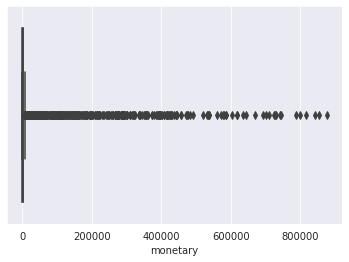

In [ ]:
# checking outliers on 'monetary' column
# plot boxplot of 'monetary'
sns.boxplot(x=rfm["monetary"], orient='v')


##remove outliers by monetary

In [ ]:
#### removing outliers 
# trim the dataset at 1 percentile and 99th percentile
# which means removing records below 1st percentile and above 99th percentile
# first, establish the 1st and 99th percentile
p1 = rfm.monetary.quantile(0.01)
p99 = rfm.monetary.quantile(0.99)
# Check the descriptive statistics to see if the numbers are better (especially monetary)
rfm[(rfm.monetary >= p1) & (rfm.monetary <= p99)].describe()

,recency,frequency,monetary
count,18851.000000,18851.000000,18851.000000
mean,190.459339,4.106838,2366.388156
std,149.985116,8.686692,8216.586379
min,0.000000,1.000000,4.990000
25%,85.000000,2.000000,54.980000
50%,166.000000,3.000000,548.980000
75%,264.000000,4.000000,2751.417500
max,1126.000000,181.000000,144602.581600


In [ ]:
# apply the changes to remove records below and above 99th percentile
rfm = rfm[(rfm.monetary >= p1) & (rfm.monetary <= p99)]
rfm

,recency,frequency,monetary
CustomerID,,,
11000,270,8,8248.9900
11001,49,11,6383.8800
11002,339,4,8114.0400
11003,263,9,8139.2900
11004,272,6,8196.0100
...,...,...,...
30106,426,114,101203.5836
30108,457,105,144602.5816
30110,426,6,1625.2755


In [ ]:
# output cleaned file so can refer to this file in the future
rfm.to_csv(r'/content/drive/MyDrive/Colab Notebooks\rfm.csv', index=False)

In [ ]:
# use pandas profiling to check the RFM dataset
rfm.profile_report(explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##clustering

In [ ]:
# run clustering using pycaret
!pip3 install pycaret
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scipy-1.5.4-cp38-cp38-manylinux1_x86_64.whl (25.8 MB)
  Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
  Using cached numpy-1.20.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.4 MB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
  Attempting uninstall: pyyaml
    Found existing installation: pyyaml 6.0
ERROR: Cannot uninstall pyyaml 6.0, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps pyyaml==6.0'.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.clustering import *
model = setup(data=rfm, silent=True)

,Description,Value
0,session_id,7928
1,Original Data,"(18851, 3)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(18851, 3)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [ ]:
# create empty dataframe to store results
rfm_results = pd.DataFrame()
# run through multiple clusters to check which has the best results
from tqdm import trange
for i in trange(2,11):
    rfm_kmeans = create_model('kmeans',
                           num_clusters=i,
                           init='k-means++',
                           n_init=10,
                           max_iter=300,
                           random_state=42
                           )
    metrics = pull()
    metrics['algo'] = 'kmeans'
    metrics['num_clusters'] = i
    rfm_results = rfm_results.append(metrics)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7081,204709.319,0.477,0,0,0


INFO:logs:create_model_container: 9
INFO:logs:master_model_container: 9
INFO:logs:display_container: 10
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................
100%|██████████| 9/9 [01:19<00:00,  8.85s/it]


In [ ]:
# Sillhoutte and Calinski-Harabasz, greater the better
# Davies-Boudlin record in get_metrics() is wrong, should be lower the better
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7f1fcd1a1430>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7f1fcd1...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7f1fcd1a1700>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7f1fcdd6ba60>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7f1fcdd6b8b0>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7f1fcdd6baf0>,make_scorer(completeness_score),pred,{},True,True,False


In [ ]:
# check the results of mulitiple number of clusters
rfm_results

# Silhoutte says 2 clusters
# Calinski says 10 or more clusteres
# Davis says 2 clusters (smaller is better)
# plot model says 4

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,algo,num_clusters
0,0.9695,72692.6599,0.2827,0,0,0,kmeans,2
0,0.9424,68919.9982,0.4180,0,0,0,kmeans,3
0,0.7226,92845.0921,0.4702,0,0,0,kmeans,4
0,0.7233,105439.2533,0.4980,0,0,0,kmeans,5
0,0.7237,115934.8467,0.4864,0,0,0,kmeans,6
0,0.7130,140459.0392,0.4959,0,0,0,kmeans,7
0,0.7142,153007.5842,0.4819,0,0,0,kmeans,8
0,0.7164,174775.6447,0.4686,0,0,0,kmeans,9
0,0.7081,204709.3190,0.4770,0,0,0,kmeans,10


In [ ]:
# let's go with 4 clusters
# create model based on 4 clusters
best_model = create_model('kmeans',
                          num_clusters=4,
                          init='k-means++',
                          n_init=10,
                          max_iter=300,
                          random_state=42
                          )

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7226,92845.0921,0.4702,0,0,0


INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 11
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


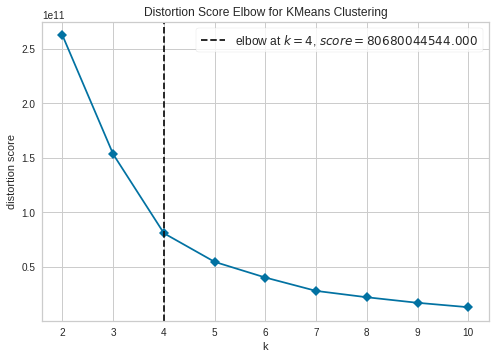

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# plot the elbow plot to confirm 4 is recommended
plot_model(rfm_kmeans, plot='elbow')

In [ ]:
# assign the cluster number (starting from 0) to the RFM dataset
rfm_df = assign_model(best_model)
rfm_df.Cluster.value_counts()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(18851, 4)
INFO:logs:assign_model() succesfully completed......................................


Cluster 0    14330
Cluster 2     4353
Cluster 1       88
Cluster 3       80
Name: Cluster, dtype: int64

In [ ]:
rfm_df

,recency,frequency,monetary,Cluster
CustomerID,,,,
11000,270,8,8248.9900,Cluster 2
11001,49,11,6383.8800,Cluster 2
11002,339,4,8114.0400,Cluster 2
11003,263,9,8139.2900,Cluster 2
11004,272,6,8196.0100,Cluster 2
...,...,...,...,...
30106,426,114,101203.5836,Cluster 3
30108,457,105,144602.5816,Cluster 3
30110,426,6,1625.2755,Cluster 0


<AxesSubplot: xlabel='Cluster', ylabel='recency'>

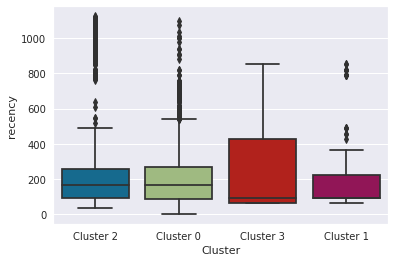

In [ ]:
# Clusters vs Recency
sns.boxplot(x=rfm_df['Cluster'], y=rfm_df['recency'])

<AxesSubplot: xlabel='Cluster', ylabel='frequency'>

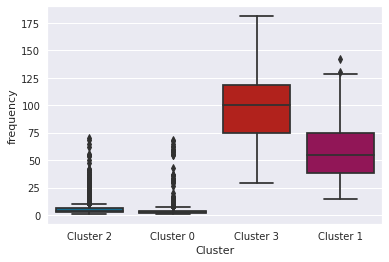

In [ ]:
# Clusters vs Frequency
sns.boxplot(x=rfm_df['Cluster'], y=rfm_df['frequency'])

<AxesSubplot: xlabel='Cluster', ylabel='monetary'>

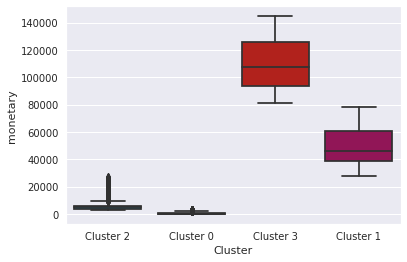

In [ ]:
# Clusters vs Monetary Value
sns.boxplot(x=rfm_df['Cluster'], y=rfm_df['monetary'])

In [ ]:
# reset the index so the CustomerID becomes a column
rfm_df = rfm_df.reset_index()

In [ ]:
rfm_df

,CustomerID,recency,frequency,monetary,Cluster
0,11000,270,8,8248.9900,Cluster 2
1,11001,49,11,6383.8800,Cluster 2
2,11002,339,4,8114.0400,Cluster 2
3,11003,263,9,8139.2900,Cluster 2
4,11004,272,6,8196.0100,Cluster 2
...,...,...,...,...,...
18846,30106,426,114,101203.5836,Cluster 3
18847,30108,457,105,144602.5816,Cluster 3
18848,30110,426,6,1625.2755,Cluster 0
18849,30114,121,30,11652.9911,Cluster 2


##calculate lifetime value per customer

In [ ]:
# calculate the average spend value per customer by taking monetary (total amount spent) / frequency (how many times spent)
rfm_df['avg_spend_value'] = rfm_df['monetary']/rfm_df['frequency']
rfm_df

,CustomerID,recency,frequency,monetary,Cluster,avg_spend_value
0,11000,270,8,8248.9900,Cluster 2,1031.123750
1,11001,49,11,6383.8800,Cluster 2,580.352727
2,11002,339,4,8114.0400,Cluster 2,2028.510000
3,11003,263,9,8139.2900,Cluster 2,904.365556
4,11004,272,6,8196.0100,Cluster 2,1366.001667
...,...,...,...,...,...,...
18846,30106,426,114,101203.5836,Cluster 3,887.750733
18847,30108,457,105,144602.5816,Cluster 3,1377.167444
18848,30110,426,6,1625.2755,Cluster 0,270.879250
18849,30114,121,30,11652.9911,Cluster 2,388.433037


In [ ]:
# calculate the maximum number of days in the dataset


In [ ]:
# find out how long the company has been serving each customer: years of service
# max_no_days - recency
max_no_days = max(df_sales_order['OrderDate']) -min(df_sales_order['OrderDate'])
max_no_days = max_no_days.days

In [ ]:
# calculate lifetime value
# average spend value * years of service
rfm_df['years_of_service'] = (max_no_days - rfm_df['recency']) / 365

In [ ]:
rfm_df['lifetime_value'] = rfm_df['avg_spend_value'] * rfm_df['years_of_service']
rfm_df

,CustomerID,recency,frequency,monetary,Cluster,avg_spend_value,years_of_service,lifetime_value
0,11000,270,8,8248.9900,Cluster 2,1031.123750,2.345205,2418.197068
1,11001,49,11,6383.8800,Cluster 2,580.352727,2.950685,1712.438047
2,11002,339,4,8114.0400,Cluster 2,2028.510000,2.156164,4373.801014
3,11003,263,9,8139.2900,Cluster 2,904.365556,2.364384,2138.267053
4,11004,272,6,8196.0100,Cluster 2,1366.001667,2.339726,3196.069653
...,...,...,...,...,...,...,...,...
18846,30106,426,114,101203.5836,Cluster 3,887.750733,1.917808,1702.535653
18847,30108,457,105,144602.5816,Cluster 3,1377.167444,1.832877,2524.178137
18848,30110,426,6,1625.2755,Cluster 0,270.879250,1.917808,519.494452
18849,30114,121,30,11652.9911,Cluster 2,388.433037,2.753425,1069.521101


##get in customer demographics

In [ ]:
# read in Sales vPersonDemographics to get Customer demographics
df_sales_demographics = pd.read_excel(file_path, sheet_name = "Sales vPersonDemographics")


In [ ]:
# merge to SalesCustomer to get CustomerID into Person Demographics
df_customer_demographics = df_sales_demographics.merge(df_sales_customer[['CustomerID', 'PersonID']], 
                                           how='left', 
                                           left_on='BusinessEntityID',
                                           right_on='PersonID')
df_customer_demographics

,BusinessEntityID,TotalPurchaseYTD,DateFirstPurchase,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,CustomerID,PersonID
0,3058,19.20,2004-04-07,1979-05-07,S,25001-50000,F,0.0,0.0,Partial College,Clerical,0.0,1.0,26212.0,3058.0
1,3246,557.49,2003-10-24,1975-11-07,S,25001-50000,F,0.0,0.0,Partial College,Clerical,0.0,1.0,21126.0,3246.0
2,3089,-24.99,2004-03-04,1976-05-20,S,25001-50000,F,0.0,0.0,Partial College,Clerical,0.0,1.0,18033.0,3089.0
3,3273,-21.49,2004-02-12,1976-04-08,S,25001-50000,F,0.0,0.0,Partial College,Clerical,0.0,1.0,27832.0,3273.0
4,3446,-37.01,2004-02-12,1976-01-19,S,25001-50000,F,0.0,0.0,Partial College,Clerical,0.0,1.0,22707.0,3446.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,2351,0.00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19968,2340,0.00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19969,2326,0.00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19970,2324,0.00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop customers without demographics
df_customer_demographics.dropna(inplace=True)
df_customer_demographics

,BusinessEntityID,TotalPurchaseYTD,DateFirstPurchase,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,CustomerID,PersonID
0,3058,19.20,2004-04-07,1979-05-07,S,25001-50000,F,0.0,0.0,Partial College,Clerical,0.0,1.0,26212.0,3058.0
1,3246,557.49,2003-10-24,1975-11-07,S,25001-50000,F,0.0,0.0,Partial College,Clerical,0.0,1.0,21126.0,3246.0
2,3089,-24.99,2004-03-04,1976-05-20,S,25001-50000,F,0.0,0.0,Partial College,Clerical,0.0,1.0,18033.0,3089.0
3,3273,-21.49,2004-02-12,1976-04-08,S,25001-50000,F,0.0,0.0,Partial College,Clerical,0.0,1.0,27832.0,3273.0
4,3446,-37.01,2004-02-12,1976-01-19,S,25001-50000,F,0.0,0.0,Partial College,Clerical,0.0,1.0,22707.0,3446.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19114,4203,0.00,2003-06-25,1961-06-24,S,0-25000,M,1.0,1.0,Partial College,Manual,0.0,0.0,16532.0,4203.0
19115,7555,0.00,2002-12-14,1964-06-17,S,0-25000,F,3.0,2.0,Partial High School,Manual,1.0,2.0,16414.0,7555.0
19116,11037,0.00,2003-09-06,1968-03-12,S,0-25000,M,1.0,1.0,Partial College,Manual,0.0,0.0,16574.0,11037.0
19117,19959,0.00,2002-08-25,1973-12-24,S,75001-100000,F,0.0,5.0,High School,Management,1.0,2.0,21558.0,19959.0


In [ ]:
# merge customer demographics to RFM dataset by CustomerID
df_customer_rfm = df_customer_demographics.merge(rfm_df,
                                                 how='inner', 
                                                 on='CustomerID')
df_customer_rfm

,BusinessEntityID,TotalPurchaseYTD,DateFirstPurchase,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,...,NumberCarsOwned,CustomerID,PersonID,recency,frequency,monetary,Cluster,avg_spend_value,years_of_service,lifetime_value
0,3058,19.20,2004-04-07,1979-05-07,S,25001-50000,F,0.0,0.0,Partial College,...,1.0,26212.0,3058.0,115,2,23.78,Cluster 0,11.890000,2.769863,32.933671
1,3246,557.49,2003-10-24,1975-11-07,S,25001-50000,F,0.0,0.0,Partial College,...,1.0,21126.0,3246.0,281,3,565.47,Cluster 0,188.490000,2.315068,436.367260
2,3089,-24.99,2004-03-04,1976-05-20,S,25001-50000,F,0.0,0.0,Partial College,...,1.0,18033.0,3089.0,149,1,24.99,Cluster 0,24.990000,2.676712,66.891041
3,3273,-21.49,2004-02-12,1976-04-08,S,25001-50000,F,0.0,0.0,Partial College,...,1.0,27832.0,3273.0,170,1,21.49,Cluster 0,21.490000,2.619178,56.286137
4,3446,-37.01,2004-02-12,1976-01-19,S,25001-50000,F,0.0,0.0,Partial College,...,1.0,22707.0,3446.0,170,3,62.97,Cluster 0,20.990000,2.619178,54.976548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18404,4203,0.00,2003-06-25,1961-06-24,S,0-25000,M,1.0,1.0,Partial College,...,0.0,16532.0,4203.0,129,3,4921.69,Cluster 2,1640.563333,2.731507,4481.209982
18405,7555,0.00,2002-12-14,1964-06-17,S,0-25000,F,3.0,2.0,Partial High School,...,2.0,16414.0,7555.0,245,3,4919.30,Cluster 2,1639.766667,2.413699,3957.902557
18406,11037,0.00,2003-09-06,1968-03-12,S,0-25000,M,1.0,1.0,Partial College,...,0.0,16574.0,11037.0,63,3,44.97,Cluster 0,14.990000,2.912329,43.655808
18407,19959,0.00,2002-08-25,1973-12-24,S,75001-100000,F,0.0,5.0,High School,...,2.0,21558.0,19959.0,144,3,4919.30,Cluster 2,1639.766667,2.690411,4411.646210


In [ ]:
df_customer_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18409 entries, 0 to 18408
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BusinessEntityID      18409 non-null  int64         
 1   TotalPurchaseYTD      18409 non-null  float64       
 2   DateFirstPurchase     18409 non-null  datetime64[ns]
 3   BirthDate             18409 non-null  datetime64[ns]
 4   MaritalStatus         18409 non-null  object        
 5   YearlyIncome          18409 non-null  object        
 6   Gender                18409 non-null  object        
 7   TotalChildren         18409 non-null  float64       
 8   NumberChildrenAtHome  18409 non-null  float64       
 9   Education             18409 non-null  object        
 10  Occupation            18409 non-null  object        
 11  HomeOwnerFlag         18409 non-null  float64       
 12  NumberCarsOwned       18409 non-null  float64       
 13  CustomerID      

##regression

In [ ]:
# run the prediction model
# since lifetime_value is a numeric variable
# we should be using regression

# import pycaret regression module
from pycaret.regression import *

#### setup model
# ignore_features: ignore the features that will cause problems (e.g. high cardinality or just identifier) or have high correlation to lifetime_value
# categorical_features: define features that are categories. The columns will go through one hot encoding
# numeric_features: define features that are numeric in nature
# ordinal_features: one/some feature/s may be ordinal, i.e. categorical but having ranking
# date_features: define date features
# test other setup options to see which one gives you the best results
model = setup(data=df_customer_rfm,
              target='lifetime_value',
              ignore_features=['BusinessEntityID', 
                               'CustomerID', 
                               'PersonID', 
                               'recency', 
                               'monetary', 
                               'frequency', 
                               'avg_spend_value', 
                               'years_of_service'],
              categorical_features=['MaritalStatus',
                                    'YearlyIncome',
                                    'Gender',
                                    'Occupation',
                                    'Cluster'],
              numeric_features=['TotalPurchaseYTD',
                                'NumberChildrenAtHome',
                                'TotalChildren',
                                'HomeOwnerFlag',
                                'NumberCarsOwned'],
              ordinal_features={'Education':['Partial High School',
                                             'High School',
                                             'Partial College',
                                             'Bachelors',
                                             'Graduate Degree']},
              date_features=['DateFirstPurchase',
                             'BirthDate'],
              normalize=True,
              normalize_method='minmax',
              #transformation=True,
              #pca=True,
              #pca_components=5,
              #ignore_low_variance=True,
              #combine_rare_levels=True,
              #remove_multicollinearity=True,
              polynomial_features=True,
              polynomial_degree=3,
              trigonometry_features=True,
              #feature_interaction=True,
              silent=True,
              session_id=42
              )

,Description,Value
0,session_id,42
1,Target,lifetime_value
2,Original Data,"(18409, 22)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,6
6,Ordinal Features,True
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12886, 65)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['MaritalStatus',
                                                            'YearlyIncome',
                                                            'Gender',
                                                            'Occupation',
                                                            'Cluster'],
                                      display_types=False,
                                      features_todrop=['BusinessEntityID',
                                                       'CustomerID', 'PersonID',
                                                       'recency', 'monetary',
                                                       'frequency',
                                                       'avg_spend_value',
                                  

In [ ]:
# compare models
# sort such that the model with the lowest MAPE is on top
compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,211.0985,2.221600e+05,470.2986,0.9052,0.3563,0.2714,12.162
dt,Decision Tree Regressor,260.6087,4.149694e+05,642.6545,0.8229,0.4317,0.3025,0.380
et,Extra Trees Regressor,241.0472,2.668274e+05,515.6989,0.8862,0.4097,0.3514,13.149
lightgbm,Light Gradient Boosting Machine,254.6699,2.639639e+05,512.9073,0.8875,0.5976,0.6247,0.299
gbr,Gradient Boosting Regressor,304.0400,3.279397e+05,571.5866,0.8604,0.6820,0.8297,2.809
par,Passive Aggressive Regressor,652.7681,1.374430e+06,1171.7446,0.4133,1.4240,1.6558,0.196
huber,Huber Regressor,658.6421,1.316078e+06,1146.6007,0.4383,1.4923,2.7436,0.688
ada,AdaBoost Regressor,581.0598,6.124448e+05,780.0640,0.7393,1.6781,6.1515,0.732
ridge,Ridge Regression,762.1300,1.114186e+06,1055.0948,0.5243,1.8286,6.9010,0.039
lr,Linear Regression,762.3268,1.114263e+06,1055.1314,0.5243,1.8296,6.9012,0.614


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# create the best model
best_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,217.8761,213568.6807,462.1349,0.9104,0.4219,0.2873
1,195.8198,178131.7035,422.0565,0.9228,0.3154,0.2372
2,217.6190,207466.8616,455.4853,0.9101,0.3702,0.3072
3,197.9720,192831.4386,439.1258,0.9099,0.3506,0.2914
4,220.7050,215582.7445,464.3089,0.9100,0.3890,0.3021
5,212.3149,260457.5745,510.3504,0.8844,0.3210,0.2242
6,210.4061,288158.5937,536.8041,0.8862,0.3476,0.2535
7,216.3260,230904.0294,480.5247,0.8979,0.3336,0.2527
8,208.7425,215772.5858,464.5133,0.9159,0.3567,0.2922


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


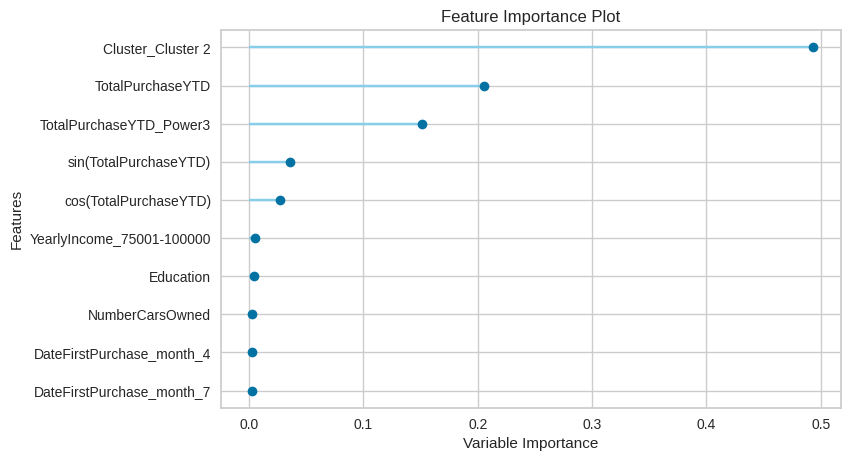

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# plot the feature importance of the best model
plot_model(best_model, plot='feature')

In [ ]:
# since cluster 2 is the most important
# extract out cluster 2 customer demographics and compare to the biggest cluster (cluster 0)
df_cluster_0 = df_customer_rfm[df_customer_rfm['Cluster']=='Cluster 0']
df_cluster_2 = df_customer_rfm[df_customer_rfm['Cluster']=='Cluster 2']

In [ ]:
# run pandas profiling on cluster 2
df_cluster_2.profile_report().to_file("cluster_2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# run pandas profiling on cluster 2
df_cluster_0.profile_report().to_file("cluster_0.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#### Comparison of Cluster 2 to Cluster 0

# higher TotalPurchaseYTD compared to cluster 0
# more 50-75k YearlyIncome
# higher % of bachelors 
# double the frequency
# ten times the monetary
# 5 times lifetime value